In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_train)

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 5, validation_split=0.33)

Epoch 1/5
1257/1257 [==============================] - 12s 8ms/step - loss: 0.0483 - accuracy: 0.9303 - val_loss: 0.0218 - val_accuracy: 0.9721
Epoch 2/5
1257/1257 [==============================] - 13s 10ms/step - loss: 0.0161 - accuracy: 0.9797 - val_loss: 0.0164 - val_accuracy: 0.9769
Epoch 3/5
1257/1257 [==============================] - 7s 5ms/step - loss: 0.0110 - accuracy: 0.9858 - val_loss: 0.0135 - val_accuracy: 0.9810
Epoch 4/5
1257/1257 [==============================] - 6s 5ms/step - loss: 0.0079 - accuracy: 0.9907 - val_loss: 0.0123 - val_accuracy: 0.9832
Epoch 5/5
1257/1257 [==============================] - 7s 5ms/step - loss: 0.0058 - accuracy: 0.9932 - val_loss: 0.0126 - val_accuracy: 0.9822


1/1 [==============================] - 0s 57ms/step
6


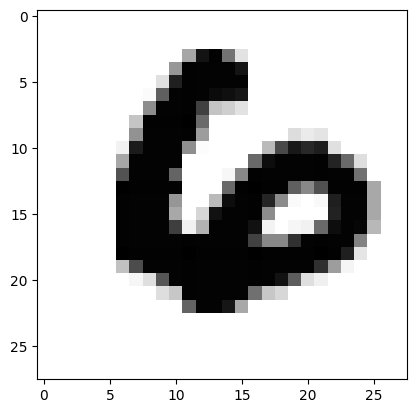

In [ ]:
image_index = 5558
from matplotlib import pyplot as plt
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())